# Getting Started with APMonitor

This [IPython notebook](http://ipython.org/notebook.html) demonstrates the use of APMonitor from an iPython notebook. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

J.C. Kantor (Kantor.1@nd.edu)

The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

## Using APMonitor from an iPython Notebook

[APMonitor](http://apmonitor.com/) ('Advanced Process Monitor') is a system for modeling and solving engineering problems. The system consists of a simple, non-procedural language for describing a mathematical model, solvers that reside on remote servers, and software tools for managing the process of obtaining a solution to specific problems.

## Example 1. Solving simple material balances

### Problem Statement

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("KrrZB5LvXF4",560,315,start=0,end=72)

### Solution

####Step 1. Create the APMonitor Model

For this problem a viable model has two key parts. The first describes the variables for the problem which, in this case, are molar flowrates. Below we demonstrate the declaration of two molar flowrates with subscripts, and restricted to be variables greater than zero. (It's always a good idea to include and known constraints on variables.)

The second part lists the equations. In the case the equations are linear. Notice that the equations are simply declarations of algebraic relationships. They declare relationships, they do not tell the computer how to do the needed calculations.

In [1]:
%%writefile ex1.apm

Variables
  N[1] >= 0
  N[2] >= 0
End Variables

Equations
  100 = N[1] + N[2]
  30 = 0.7*N[1] + 0.2*N[2]
End Equations

Overwriting ex1.apm


In [19]:
import apm

####Step 2. Call the Solver

The solver is called using apm_solve from the apm python package. apm_solve requires two arguments. The first is the name of the file in which the model has been saved, and the second is a flag describing the type of problem to be solved. A system of steady-state equations with no degrees of freedom is type = 1.

In [20]:
soln = apm.apm.apm_solve('ex1',1)

####Step 3. Display the Solution

In [21]:
import pandas as pd
pd.Series(soln)

n[1]    20
n[2]    80
dtype: float64

In [275]:
soln

{'n[1]': 20.0, 'n[2]': 80.0}

### Exercise

Using the techniques demonstrated above, develop an APMonitor model for the mass balance problem described in the following video clip. The model should be written to a file exerise1.apm, and the solution displayed as a table of molar flowrates for each of the three components described in the problem statement. You'll need at least two input cells. The first is where you would write the APMonitor model and save it to your workspace with the %%writefile 'magic'.

In [221]:
from IPython.display import YouTubeVideo
YouTubeVideo("KrrZB5LvXF4",560,315,start=144,end=166)

Write your model in the following input cell.

Write commands to solve the model in the following input cell.

Write commands to display the solution in the following input cell.

## Example 2. Fitting Vapor Pressure Data with Antoine's Equation

Vapor pressure data for ethyl acetate is available from the [DDB data bank](http://www.ddbst.com/en/EED/PCP/VAP_C21.php). 

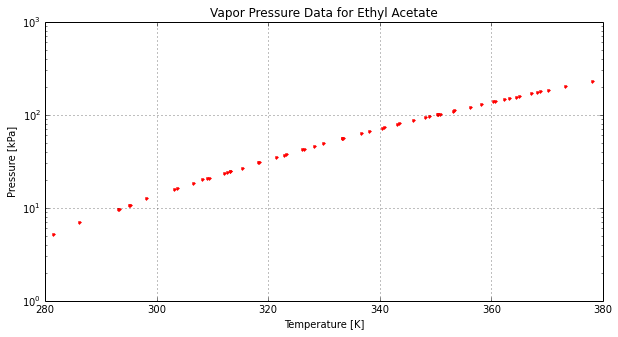

In [222]:
vapor_pressure_data = array([
    [281.52,   5.214], [286.15,   7.066], [293.15,   9.733], [293.25,   9.733], [295.15,  10.799],
    [295.31,  10.819], [298.15,  12.612], [303.15,  16.012], [303.75,  16.399], [306.45,  18.532], 
    [308.15,  20.198], [309.11,  20.772], [309.35,  21.065], [312.05,  23.598], [312.61,  24.491],
    [313.15,  25.043], [313.15,  25.078], [315.25,  26.931], [318.15,  31.064], [318.35,  31.064],
    [321.45,  35.464], [322.92,  37.266], [323.15,  38.104], [326.05,  42.396], [326.50,  43.210],
    [328.15,  46.290], [329.85,  49.463], [333.15,  55.854], [333.15,  55.942], [333.45,  56.262],
    [336.70,  63.003], [338.15,  67.008], [340.45,  72.661], [340.84,  74.274], [343.15,  79.727],
    [343.45,  80.660], [346.05,  88.659], [348.15,  94.392], [348.85,  97.192], [350.19, 101.138],
    [350.44, 101.792], [350.45, 101.325], [350.85, 102.925], [353.15, 110.991], [353.35, 113.191],
    [356.16, 122.630], [358.15, 130.349], [360.35, 140.122], [360.73, 141.508], [362.35, 148.921],
    [363.15, 152.214], [364.35, 156.347], [364.95, 161.053], [367.15, 172.253], [368.15, 176.372],
    [368.65, 179.585], [370.15, 187.051], [373.15, 203.717], [378.13, 232.208]
])

T = vapor_pressure_data[:,0]   # Kelvin
P = vapor_pressure_data[:,1]   # kPa

figure(figsize=(10,5))
semilogy(T,P,'r.')
title('Vapor Pressure Data for Ethyl Acetate')
xlabel('Temperature [K]')
ylabel('Pressure [kPa]')
grid()

Export the data to a CSV file with labeled columns.

In [223]:
import pandas as pd

df = pd.DataFrame(vapor_pressure_data,columns=['T','P'])
df.to_csv('ethyl_acetate.csv',header=1,index=0)

Antoine equation model. Parameters are initialized using estimates [from NIST](http://webbook.nist.gov/cgi/cbook.cgi?Name=ethyl+acetate) in units P[bar] and T[K]

In [224]:
%%writefile ethyl_acetate.apm

Parameters
  A = 4.22809
  B = 1245.702
  C = -55.189
End Parameters
    
Variables
  T >= 0
  P >= 0
End Variables
    
Equations
  log10(P/100.0) = A - B/(T+C)
End Equations

Overwriting ethyl_acetate.apm


In [225]:
from apm import *

soln = apm_solve('ethyl_acetate',2)

apm 107.205.28.132_ethyl_acetate<br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.6.3
 Software Trial
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 fippr_files: ss.t0 does not exist
 fippr_files: mpu.t0 does not exist
 Number of state variables:            118
 Number of total equations: -           59
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             59
 
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 File apopt.opt does not exist.
 
 Iter    Objective  Convergence
    

In [226]:
soln

[]

## Example 3. Steady State Optimization

In [229]:
%%writefile giapetto.apm

Variables
  x[1] > 0 , < 40  ! Soldiers
  x[2] > 0         ! Trains
  profit
End Variables

Equations
  maximize profit
  profit = 3 * x[1] + 2 * x[2]
  2 * x[1] + x[2] <= 100
  x[1] + x[2] <= 80
End Equations

Overwriting giapetto.apm


In [ ]:
from apm import *
z = apm_solve('giapetto',3);

In [230]:
import pandas as pd
pd.Series(z)

Optional data file giapetto.csv does not exist


profit    180
slk_3       0
slk_4       0
x[1]       20
x[2]       60
dtype: float64

## Example 4. Dynamic Simulation

In [260]:
%%writefile demo.apm

Model  

  Constants
    tau = 5
    K = 3
  End Constants

  Parameters         
   u 
  End Parameters     

  Variables          
   x = 0               
   y = 0                
  End Variables      

  Equations          
   tau * $x + x = K * u  
   y = 2 * x         
  End Equations  
    
End Model            

Overwriting demo.apm


Create a CSV file with input u as a function of t

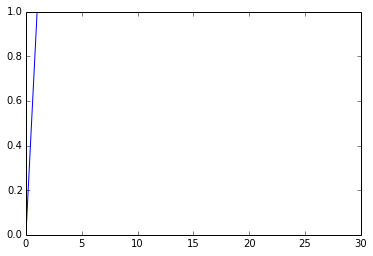

In [261]:
t = linspace(0,30,31)
u = [1.0 if tau >= 1 else 0.0 for tau in t]
plot(t,u)

Write CSV file

In [262]:
import pandas as pd
df = pd.DataFrame(zip(t,u),columns=['time','u'])
df.to_csv('demo.csv',header=1,index=0)

Solve

In [263]:
from apm import *
z = apm_solve('demo',7);

Display solution.

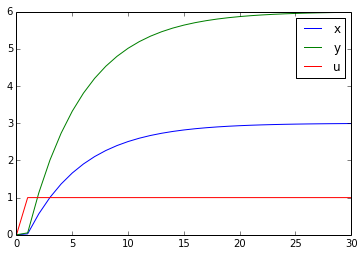

In [267]:
plot(z['time'],z['x'],z['time'],z['y'],z['time'],z['u'])
legend(['x','y','u'])